In [160]:
#Libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [161]:
#Data

Dataset = pd.read_csv("C_R.csv")

In [162]:
#Data Brief
Dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [163]:
#Data Cleaning
Dataset.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

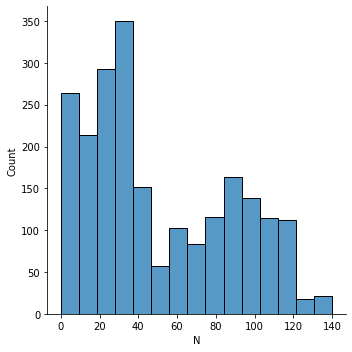

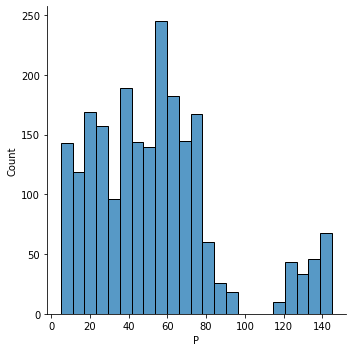

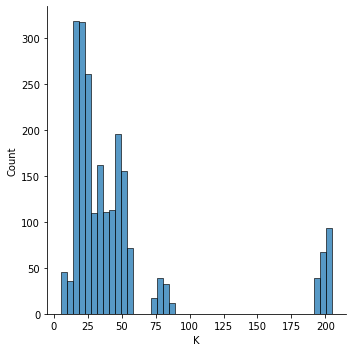

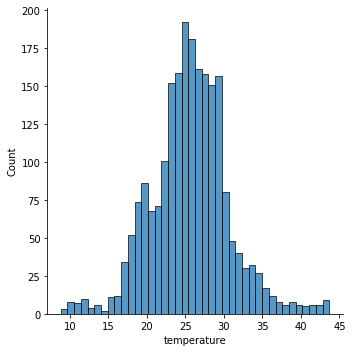

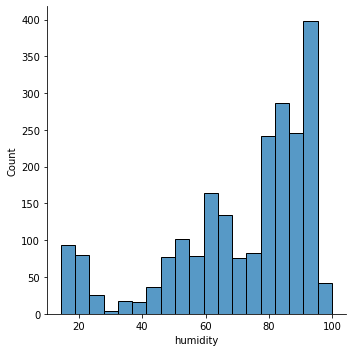

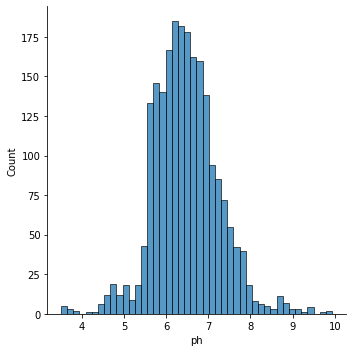

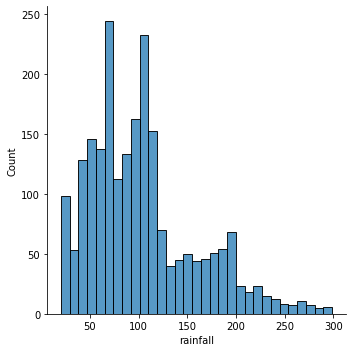

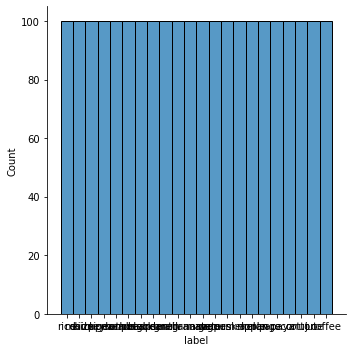

In [164]:
#Data Visualisation by Column
Dataset_col = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

for i in Dataset_col:
    sns.displot(data = Dataset, x = Dataset[i] )

# KNN Clustering

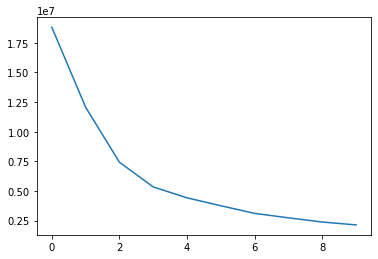

In [166]:
#Elbow Method
X = Dataset.iloc[:, :-1].values

from sklearn.cluster import KMeans

wsss = []

for i in range(1,11):
    
    K_Score = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    K_Score.fit(X)
    wsss.append(K_Score.inertia_)
    
sns.lineplot(wsss)

In [178]:
#CLustering

y_mean = KMeans(n_clusters=4, init = 'k-means++', random_state=42)
y_means = y_mean.fit_predict(X)

y_means = pd.DataFrame(y_means)
y_means.columns = ['Cluster Number']

y_means_update = pd.concat([Dataset['label'],y_means], axis = 1)

y_means_update

,label,Cluster Number
0,rice,3
1,rice,3
2,rice,3
3,rice,3
4,rice,3
...,...,...
2195,coffee,3
2196,coffee,0
2197,coffee,3
2198,coffee,0


ValueError: could not convert string to float: 'rice'

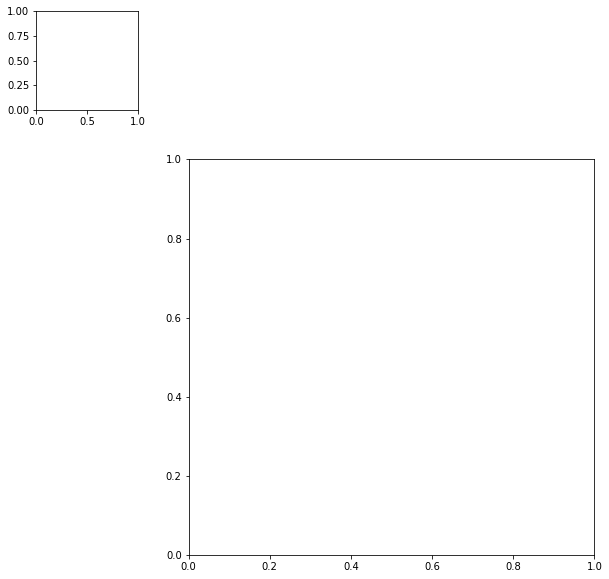

In [181]:
sns.clustermap(y_means_update)

# Logistic Regression

In [183]:
#Splitting Data
from sklearn.model_selection import train_test_split

x = Dataset.iloc[:,:-1].values
y = Dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)



In [185]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

F:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
#Predict Data
y_lr = lr.predict(X_test)

In [187]:
#Collating Test Data and Predicted Data
y_lra = pd.DataFrame(y_lr)
y_testa = pd.DataFrame(y_test)

test = pd.concat([y_lra,y_testa],axis = 1)
test

,0,0
0,muskmelon,muskmelon
1,watermelon,watermelon
2,papaya,papaya
3,papaya,papaya
4,apple,apple
...,...,...
655,kidneybeans,kidneybeans
656,mothbeans,mothbeans
657,papaya,papaya
658,chickpea,chickpea


In [188]:
#Metrics - Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_lr,y_test)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  4,  0,  0,
         0,  0,  2,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 27,  0,  0,  0,  0,  4,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 35,  0,  0,

In [189]:
#Metrics - Accuracy Score
accuracy_score(y_lr,y_test)

0.946969696969697

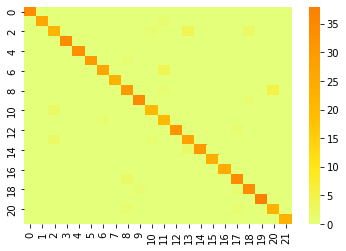

In [194]:
sns.heatmap(cm, cmap = 'Wistia')

In [192]:
from sklearn.metrics import classification_report

# Assuming we have defined and populated y_test and y_pred correctly
cr = classification_report(y_lr, y_test)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      0.96      0.98        27
   blackgram       0.85      0.76      0.80        29
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      0.97      0.98        31
      cotton       0.96      0.87      0.92        31
      grapes       1.00      1.00      1.00        23
        jute       0.88      0.83      0.86        36
 kidneybeans       0.97      0.97      0.97        36
      lentil       0.91      0.91      0.91        22
       maize       0.77      0.95      0.85        21
       mango       1.00      0.97      0.98        33
   mothbeans       0.82      0.90      0.86        31
    mungbean       1.00      0.94      0.97        32
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        25
      papaya       0.92    